In [1]:
import itertools as it

from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
# prints metadata about notebook runtime
nbm.print_metadata()


context: ci
hostname: e5bbd54f2e20
interpreter: 3.8.12 (default, Jan 15 2022, 18:39:47)  [GCC 7.5.0]
nbcellexec: 2
nbname: spatial-nuissance-phylometrics
nbpath: /opt/hstrat-evolutionary-inference/binder/spatial-nuissance-phylometrics.ipynb
revision: null
session: cd966971-f12e-4dd3-981d-7e9f7db88e2e
timestamp: 2023-03-12T07:55:35Z00:00


IPython==7.16.1
keyname==0.5.2
yaml==6.0
matplotlib==3.5.3
nbmetalog==0.2.6
numpy==1.21.6
pandas==1.3.5
seaborn==0.12.2
teeplot==0.2.0
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.0.3
json==2.0.9
six==1.16.0
ipykernel==5.5.3


In [3]:
df = pd.read_csv("https://osf.io/5trmg/download")
dfdigest = np.bitwise_xor.reduce(
    pd.util.hash_pandas_object(df),
)
print("{:x}".format(dfdigest))
df


3b0245309571602d


,a,epoch,mut_distn,num_generations,num_islands,num_niches,p_island_migration,p_niche_invasion,population_size,replicate,...,variance_pairwise_distance,variance_pairwise_distance_branch_only,mrca_depth,sackin_index,mean_evolutionary_distinctiveness,sum_evolutionary_distinctiveness,variance_evolutionary_distinctiveness,resolution,subsampling-fraction,trie-postprocess
0,consolidated-phylogeny,2,np.random.exponential,32768,1024,4,0.01,3.051758e-08,32768,14,...,222245.143375,10.507880,0,24568,1222.888975,3.172174e+06,216613.033012,NaN,NaN,NaN
1,consolidated-phylogeny,2,np.random.exponential,32768,1024,4,0.01,3.051758e-08,32768,48,...,229130.407979,13.872127,0,27597,1218.312041,3.318682e+06,651239.465532,NaN,NaN,NaN
2,consolidated-phylogeny,2,np.random.exponential,32768,1024,4,0.01,3.051758e-08,32768,3,...,284849.005921,11.622811,0,25234,1211.424603,3.052790e+06,514176.080681,NaN,NaN,NaN
3,consolidated-phylogeny,2,np.random.exponential,32768,1024,4,0.01,3.051758e-08,32768,10,...,188583.333771,9.209171,0,25388,1292.644315,3.547016e+06,497751.272393,NaN,NaN,NaN
4,consolidated-phylogeny,2,np.random.exponential,32768,1024,4,0.01,3.051758e-08,32768,18,...,275538.079227,12.278440,0,24122,1293.437720,3.312494e+06,518201.905151,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85795,reconstructed-tree,2,np.random.standard_normal,32768,1,4,0.01,3.051758e-08,32768,0,...,17.635489,17.635489,1,3036,170.558104,5.577250e+04,6234.641599,30.0,0.01,naive
85796,reconstructed-tree,2,np.random.standard_normal,32768,1,4,0.01,3.051758e-08,32768,42,...,21.165177,21.165177,1,436594,2.072540,6.791300e+04,0.493756,3.0,1.00,rollback
85797,reconstructed-tree,2,np.random.standard_normal,32768,1,4,0.01,3.051758e-08,32768,45,...,36.573624,36.573624,1,492068,3.755694,1.230666e+05,0.658304,10.0,1.00,expected
85798,reconstructed-tree,2,np.random.standard_normal,32768,1,4,0.01,3.051758e-08,32768,4,...,36.416021,36.416021,1,3774,123.845566,4.049750e+04,2327.128776,30.0,0.01,rollback


In [4]:
phylometrics = [
    #     'diversity',
    "colless_like_index",
    #     'average_depth',
    #     'average_origin_time',
    #     'average_origin_time_normalized',
    #     'max_depth',
    "mean_pairwise_distance",
    #     'mean_pairwise_distance_branch_only',
    #     'num_active',
    "num_ancestors",
    #     'num_outside',
    #     'num_roots',
    #     'num_taxa',
    #     'phylogenetic_diversity',
    #     'sum_pairwise_distance',
    #     'sum_pairwise_distance_branch_only',
    #     'total_orgs',
    #     'tree_size',
    #     'variance_pairwise_distance',
    #     'variance_pairwise_distance_branch_only',
    #     'mrca_depth',
    #     'sackin_index',
    "mean_evolutionary_distinctiveness",
    #     'sum_evolutionary_distinctiveness',
    #     'variance_evolutionary_distinctiveness',
]


In [5]:
methodological_variables = [
    "resolution",
]


In [6]:
evolutionary_variables = [
    "num_niches",
]


In [7]:
sensitivity_analysis_variables = [
    "epoch",
    "mut_distn",
]


In [8]:
fixed_variables = [
    "num_generations",  # homogeneous (num generations per epoch)
    "p_island_migration",  # homogeneous
    "population_size",  # homogeneous
    "subsampling-fraction",  # only use 1.0
    "trie-postprocess",  # just use naive postprocessing for now
    "tournament_size",  # only use 2
    "num_islands",  # only use 1024
]


In [9]:
# ensure fixed variables
df = df[
    (df["p_island_migration"] == 0.01)
    & (df["tournament_size"] == 2)
    & (df["num_islands"] == 1024)
    & ((df["subsampling-fraction"] == 1.0) | df["subsampling-fraction"].isna())
    & ((df["trie-postprocess"] == "naive") | df["trie-postprocess"].isna())
].copy()

for fixed_variable in fixed_variables:
    assert len(df[fixed_variable].dropna().unique()) == 1, excluded_variable

df


,a,epoch,mut_distn,num_generations,num_islands,num_niches,p_island_migration,p_niche_invasion,population_size,replicate,...,variance_pairwise_distance,variance_pairwise_distance_branch_only,mrca_depth,sackin_index,mean_evolutionary_distinctiveness,sum_evolutionary_distinctiveness,variance_evolutionary_distinctiveness,resolution,subsampling-fraction,trie-postprocess
0,consolidated-phylogeny,2,np.random.exponential,32768,1024,4,0.01,3.051758e-08,32768,14,...,222245.143375,10.507880,0,24568,1222.888975,3172174.0,216613.033012,NaN,NaN,NaN
1,consolidated-phylogeny,2,np.random.exponential,32768,1024,4,0.01,3.051758e-08,32768,48,...,229130.407979,13.872127,0,27597,1218.312041,3318682.0,651239.465532,NaN,NaN,NaN
2,consolidated-phylogeny,2,np.random.exponential,32768,1024,4,0.01,3.051758e-08,32768,3,...,284849.005921,11.622811,0,25234,1211.424603,3052790.0,514176.080681,NaN,NaN,NaN
3,consolidated-phylogeny,2,np.random.exponential,32768,1024,4,0.01,3.051758e-08,32768,10,...,188583.333771,9.209171,0,25388,1292.644315,3547016.0,497751.272393,NaN,NaN,NaN
4,consolidated-phylogeny,2,np.random.exponential,32768,1024,4,0.01,3.051758e-08,32768,18,...,275538.079227,12.278440,0,24122,1293.437720,3312494.0,518201.905151,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83224,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,49,...,13.455996,13.455996,0,449704,336.016922,11010602.5,42400.987448,3.0,1.0,naive
83228,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,21,...,14.245835,14.245835,0,436920,337.782822,11068467.5,39344.377758,3.0,1.0,naive
83232,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,29,...,24.302411,24.302411,0,518750,336.043823,11011484.0,52320.857969,100.0,1.0,naive
83236,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,15,...,18.069462,18.069462,0,477738,328.018173,10748499.5,41008.587200,100.0,1.0,naive


In [10]:
# exclude extraneous variable values
df = df[(df["a"] != "consolidated-phylogeny")].copy()

df


,a,epoch,mut_distn,num_generations,num_islands,num_niches,p_island_migration,p_niche_invasion,population_size,replicate,...,variance_pairwise_distance,variance_pairwise_distance_branch_only,mrca_depth,sackin_index,mean_evolutionary_distinctiveness,sum_evolutionary_distinctiveness,variance_evolutionary_distinctiveness,resolution,subsampling-fraction,trie-postprocess
50,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,23,...,37.631142,37.631142,0,604071,83.491943,2735864.0,2406.920938,NaN,NaN,NaN
51,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,9,...,38.206020,38.206020,0,595311,76.725006,2514125.0,2012.187097,NaN,NaN,NaN
52,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,13,...,30.968676,30.968676,0,574213,90.785004,2974843.0,3502.175924,NaN,NaN,NaN
53,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,14,...,34.799144,34.799144,0,583651,80.816681,2648201.0,1962.746427,NaN,NaN,NaN
54,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,7,...,46.214065,46.214065,0,598650,86.382446,2830580.0,2718.395632,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83224,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,49,...,13.455996,13.455996,0,449704,336.016922,11010602.5,42400.987448,3.0,1.0,naive
83228,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,21,...,14.245835,14.245835,0,436920,337.782822,11068467.5,39344.377758,3.0,1.0,naive
83232,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,29,...,24.302411,24.302411,0,518750,336.043823,11011484.0,52320.857969,100.0,1.0,naive
83236,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,15,...,18.069462,18.069462,0,477738,328.018173,10748499.5,41008.587200,100.0,1.0,naive


In [11]:
df["num_niches"].unique()


array([4, 1, 8])

In [12]:
df["num_islands"].unique()


array([1024])

In [13]:
df["tournament_size"].unique()


array([2])

In [14]:
df["a"].unique()


array(['collapsed-phylogeny', 'reconstructed-tree'], dtype=object)

In [15]:
df["regime"] = df.apply(
    lambda row: {
        (1024, 1, 3.0517578125e-08): "plain",
        (1024, 4, 3.0517578125e-08): "4 niche ecology",
        (1024, 4, 3.0517578125e-06): "weak 4 niche ecology",
        (1024, 8, 3.0517578125e-08): "8 niche ecology",
    }.get(
        tuple(row[["num_islands", "num_niches", "p_niche_invasion"]]),
        np.nan,  # default
    ),
    axis="columns",
)
df["regime"].unique()


array(['weak 4 niche ecology', '4 niche ecology', 'plain',
       '8 niche ecology'], dtype=object)

In [16]:
df[df["a"] == "collapsed-phylogeny"]["regime"].unique()


array(['weak 4 niche ecology', '4 niche ecology', 'plain',
       '8 niche ecology'], dtype=object)

# perfect phylogenetic data


In [17]:
melted_df = df[(df["a"] == "collapsed-phylogeny")].melt(
    id_vars=evolutionary_variables
    + methodological_variables
    + sensitivity_analysis_variables
    + ["regime"],
    value_vars=phylometrics,
)
melted_df["phylometric"] = melted_df["variable"]
melted_df


,num_niches,resolution,epoch,mut_distn,regime,variable,value,phylometric
0,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,colless_like_index,285971.718864,colless_like_index
1,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,colless_like_index,273326.454595,colless_like_index
2,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,colless_like_index,256190.233361,colless_like_index
3,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,colless_like_index,251531.118434,colless_like_index
4,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,colless_like_index,283485.936811,colless_like_index
...,...,...,...,...,...,...,...,...
4795,4,NaN,2,np.random.exponential,weak 4 niche ecology,mean_evolutionary_distinctiveness,58.622253,mean_evolutionary_distinctiveness
4796,4,NaN,2,np.random.exponential,weak 4 niche ecology,mean_evolutionary_distinctiveness,62.772278,mean_evolutionary_distinctiveness
4797,4,NaN,2,np.random.exponential,weak 4 niche ecology,mean_evolutionary_distinctiveness,59.941071,mean_evolutionary_distinctiveness
4798,4,NaN,2,np.random.exponential,weak 4 niche ecology,mean_evolutionary_distinctiveness,60.483948,mean_evolutionary_distinctiveness


teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf
teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png
teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf
teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png
teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf
teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png
teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf
teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=

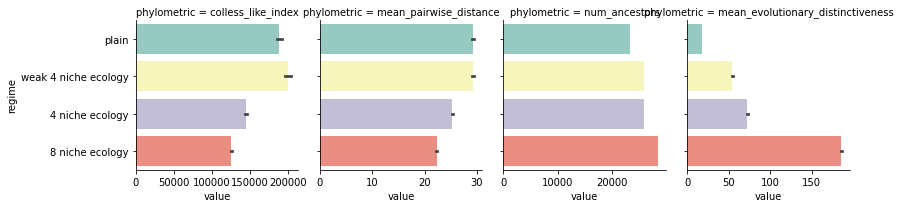

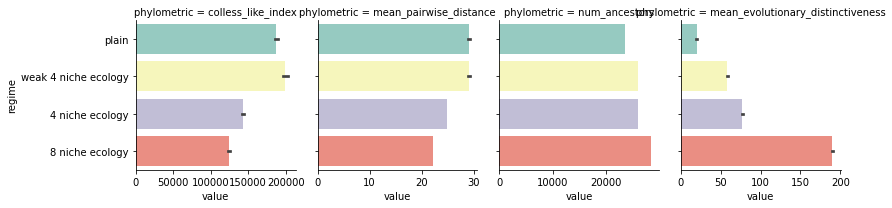

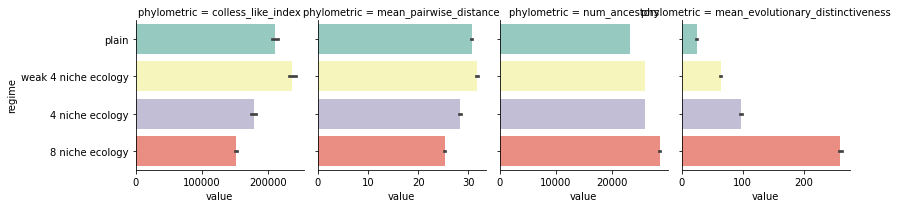

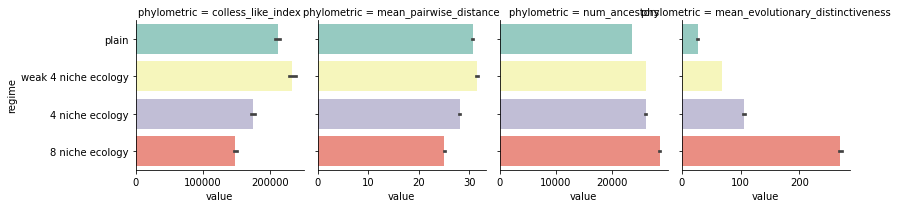

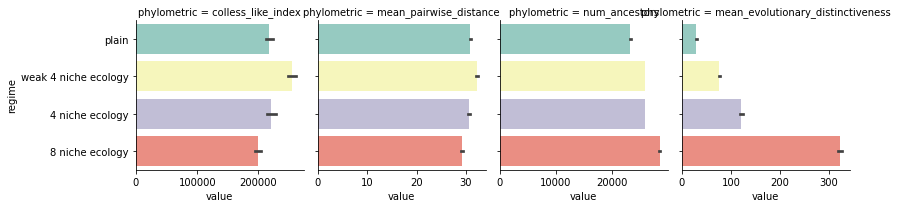

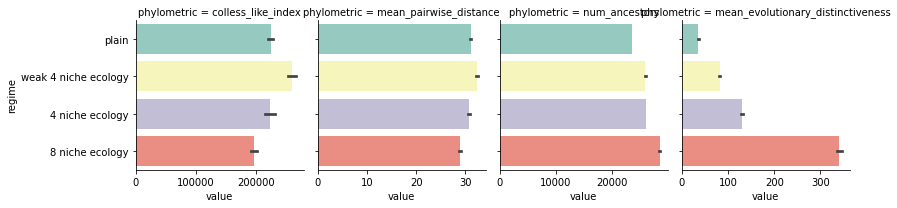

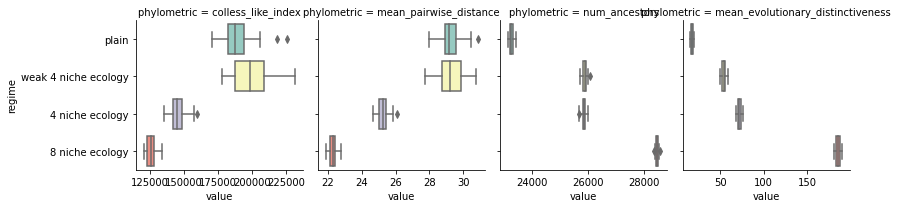

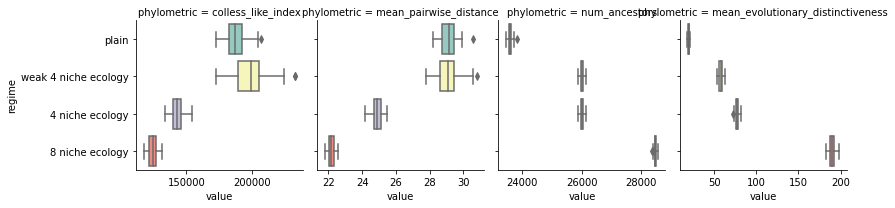

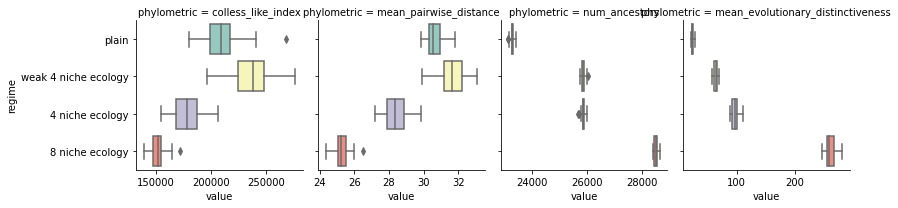

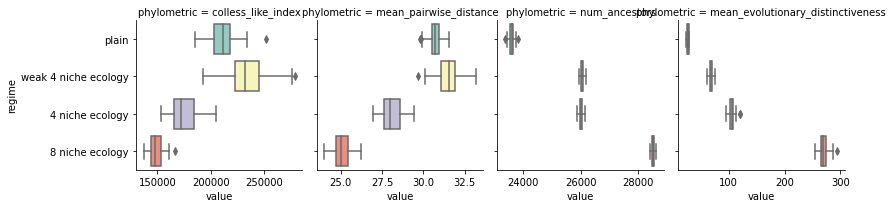

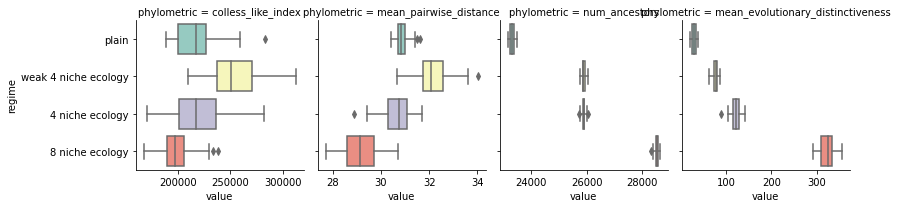

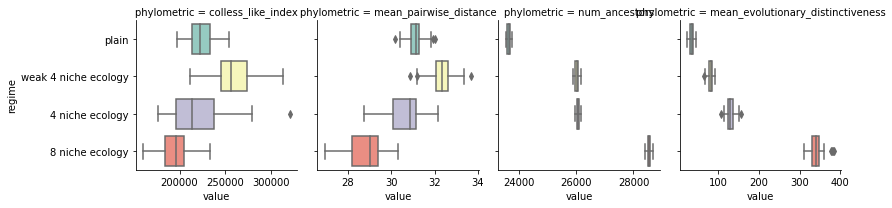

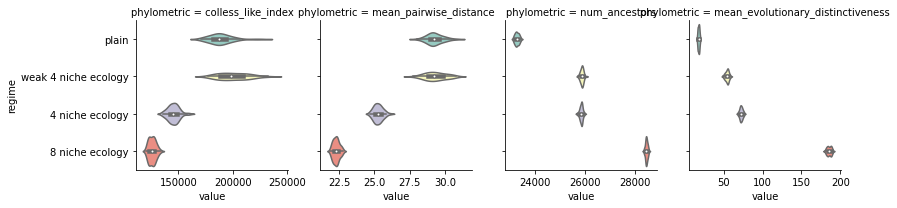

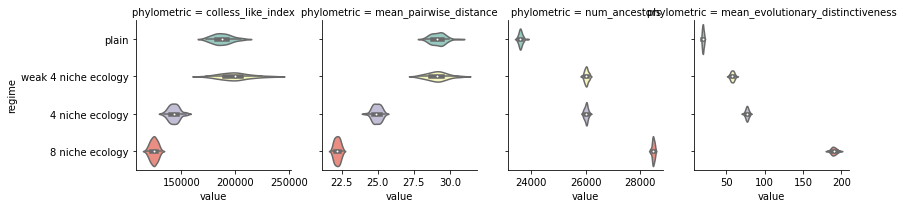

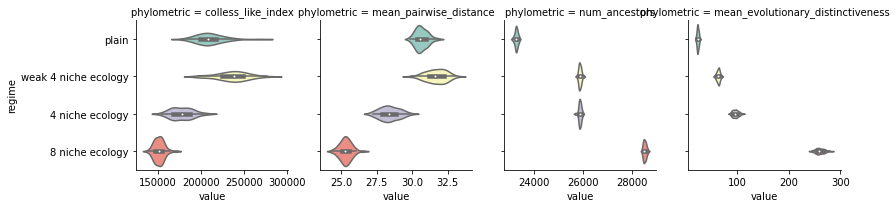

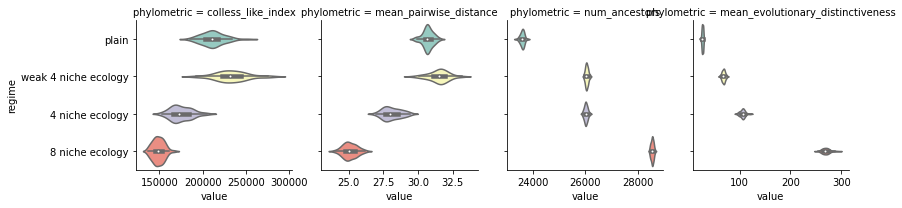

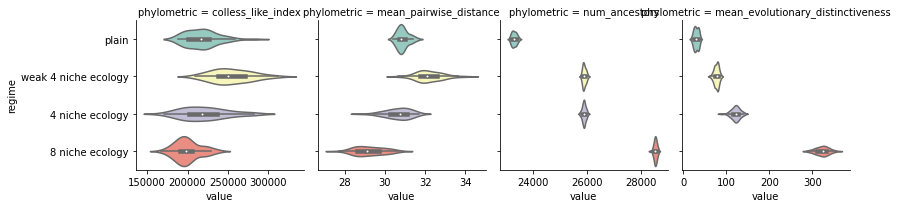

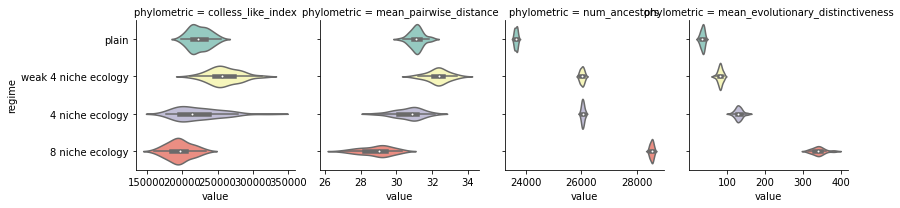

In [18]:
def make_do_plot(plotter):
    def do_plot(data, col, x, y):
        g = sns.FacetGrid(
            data,
            col=col,
            sharex=False,
        )
        g.map(
            plotter,
            x,
            y,
            order=[
                "plain",
                "weak 4 niche ecology",
                "4 niche ecology",
                "8 niche ecology",
            ],
            palette=sns.color_palette("Set3", 4),
        )

    return do_plot


for viz, (group, group_df) in it.product(
    [
        sns.barplot,
        sns.boxplot,
        sns.violinplot,
    ],
    melted_df.groupby(sensitivity_analysis_variables),
):
    do_plot = make_do_plot(viz)
    do_plot.__name__ = viz.__name__
    tp.tee(
        do_plot,
        data=group_df,
        col="phylometric",
        x="value",
        y="regime",
        teeplot_outattrs={
            **{
                "nuisance": "spatial-structure",
            },
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
        },
    )


# reconstructed phylogenetic data


In [19]:
df["quality"] = df.apply(
    lambda row: {
        ("reconstructed-tree", 3.0): "33% resolution",
        ("reconstructed-tree", 10.0): "10% resolution",
        ("reconstructed-tree", 30.0): "3% resolution",
        ("reconstructed-tree", 100.0): "1% resolution",
        ("collapsed-phylogeny", 0): "perfect resolution",
    }.get(
        tuple(row[["a", "resolution"]].fillna(0)),
        np.nan,  # default
    ),
    axis="columns",
)
df["quality"].unique()


array(['perfect resolution', '3% resolution', '33% resolution',
       '10% resolution', '1% resolution'], dtype=object)

In [20]:
melted_df = df.melt(
    id_vars=evolutionary_variables
    + methodological_variables
    + sensitivity_analysis_variables
    + ["regime", "a", "quality"],
    value_vars=phylometrics,
)
melted_df["phylometric"] = melted_df["variable"]
melted_df


,num_niches,resolution,epoch,mut_distn,regime,a,quality,variable,value,phylometric
0,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,collapsed-phylogeny,perfect resolution,colless_like_index,285971.718864,colless_like_index
1,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,collapsed-phylogeny,perfect resolution,colless_like_index,273326.454595,colless_like_index
2,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,collapsed-phylogeny,perfect resolution,colless_like_index,256190.233361,colless_like_index
3,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,collapsed-phylogeny,perfect resolution,colless_like_index,251531.118434,colless_like_index
4,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,collapsed-phylogeny,perfect resolution,colless_like_index,283485.936811,colless_like_index
...,...,...,...,...,...,...,...,...,...,...
23995,8,3.0,7,np.random.exponential,8 niche ecology,reconstructed-tree,33% resolution,mean_evolutionary_distinctiveness,336.016922,mean_evolutionary_distinctiveness
23996,8,3.0,7,np.random.exponential,8 niche ecology,reconstructed-tree,33% resolution,mean_evolutionary_distinctiveness,337.782822,mean_evolutionary_distinctiveness
23997,8,100.0,7,np.random.exponential,8 niche ecology,reconstructed-tree,1% resolution,mean_evolutionary_distinctiveness,336.043823,mean_evolutionary_distinctiveness
23998,8,100.0,7,np.random.exponential,8 niche ecology,reconstructed-tree,1% resolution,mean_evolutionary_distinctiveness,328.018173,mean_evolutionary_distinctiveness


teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf
teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png
teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf
teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png
teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf
teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png
teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext

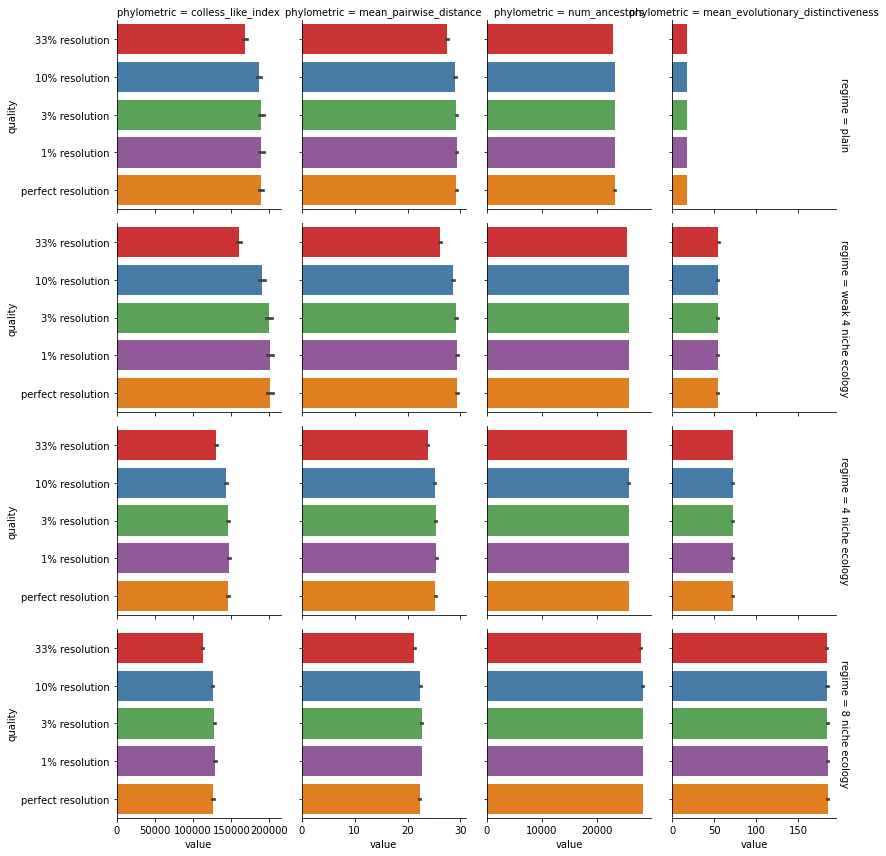

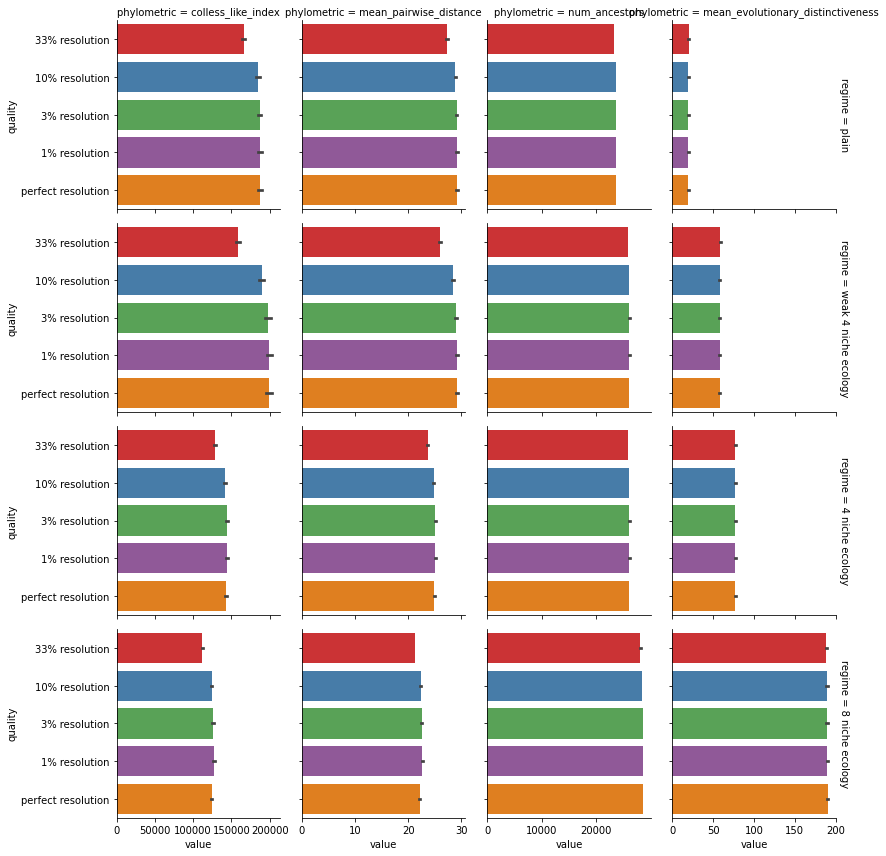

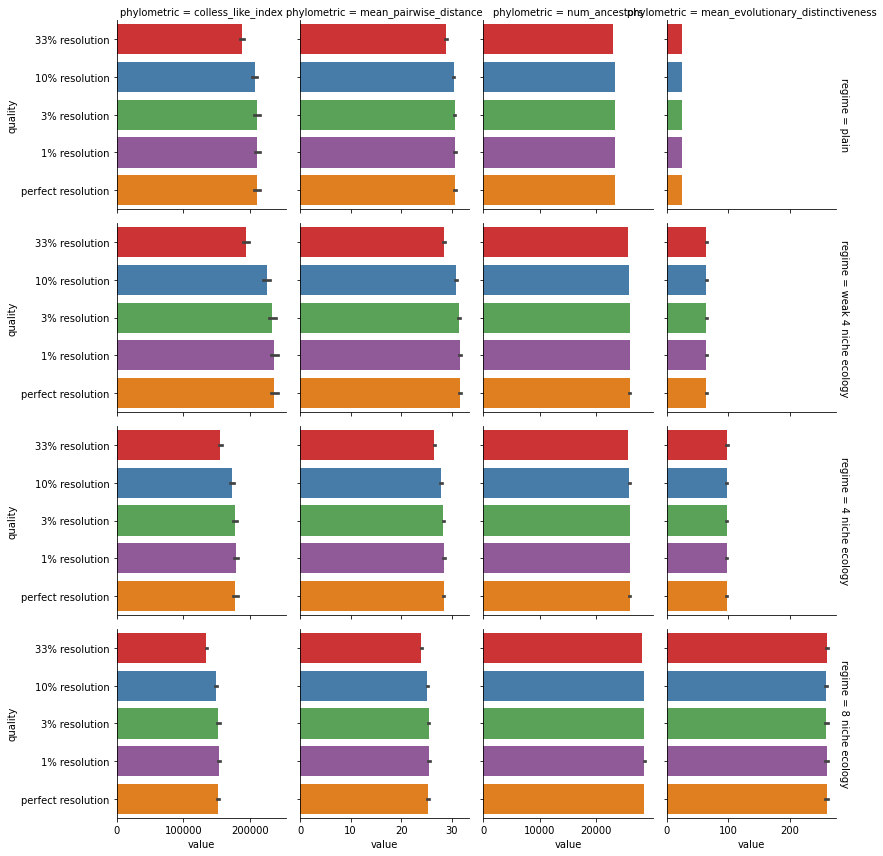

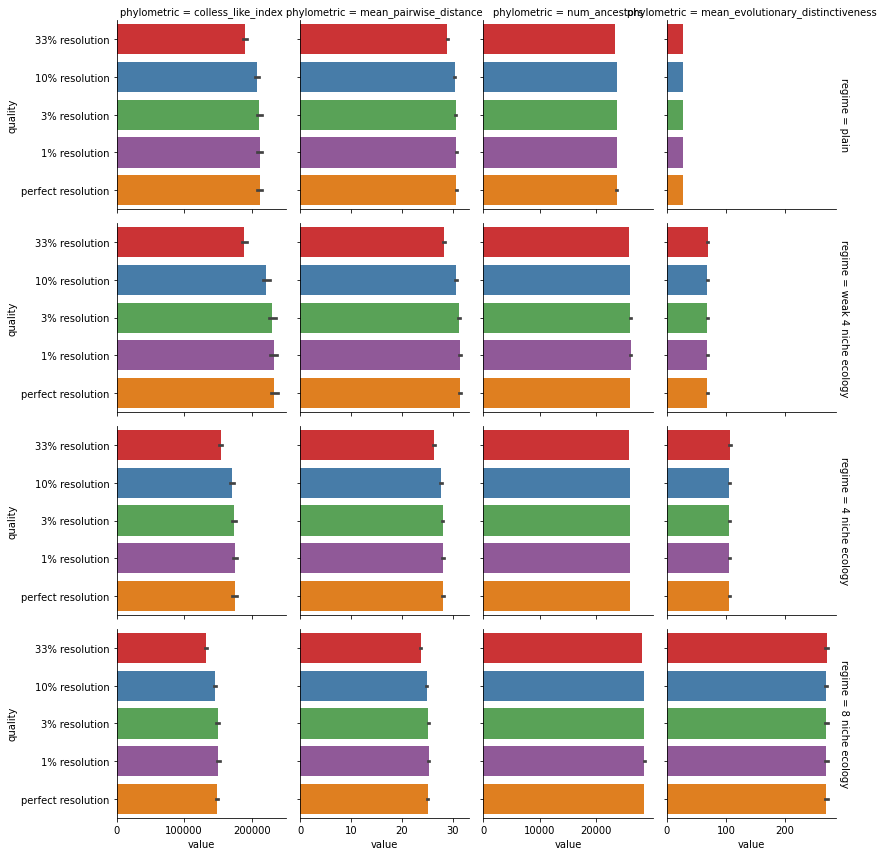

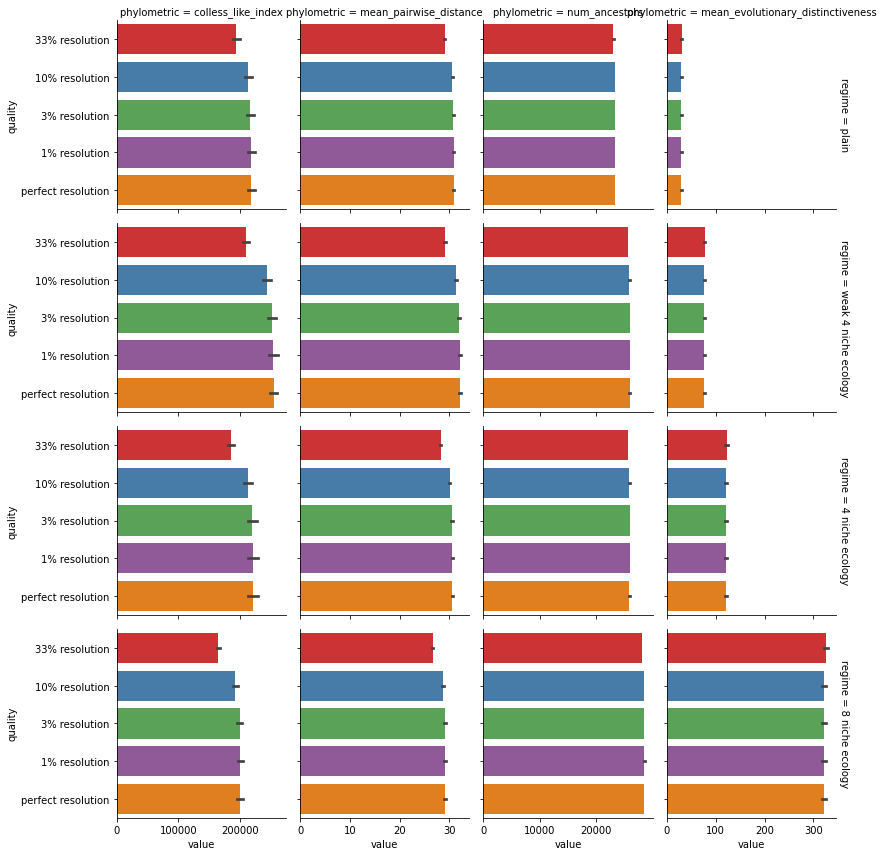

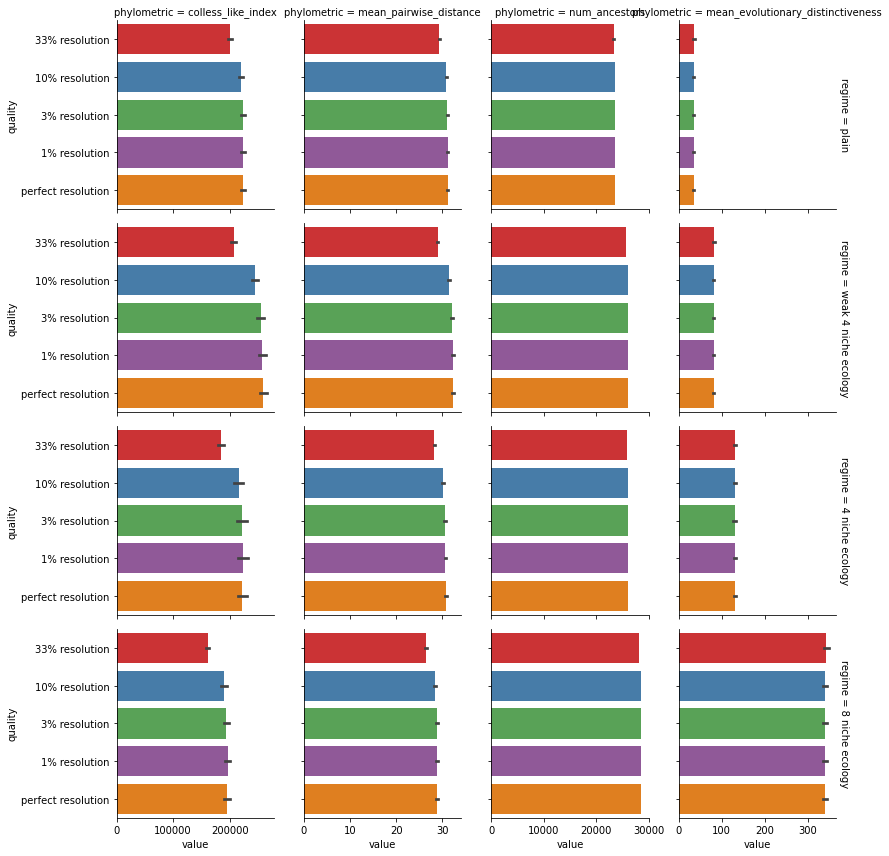

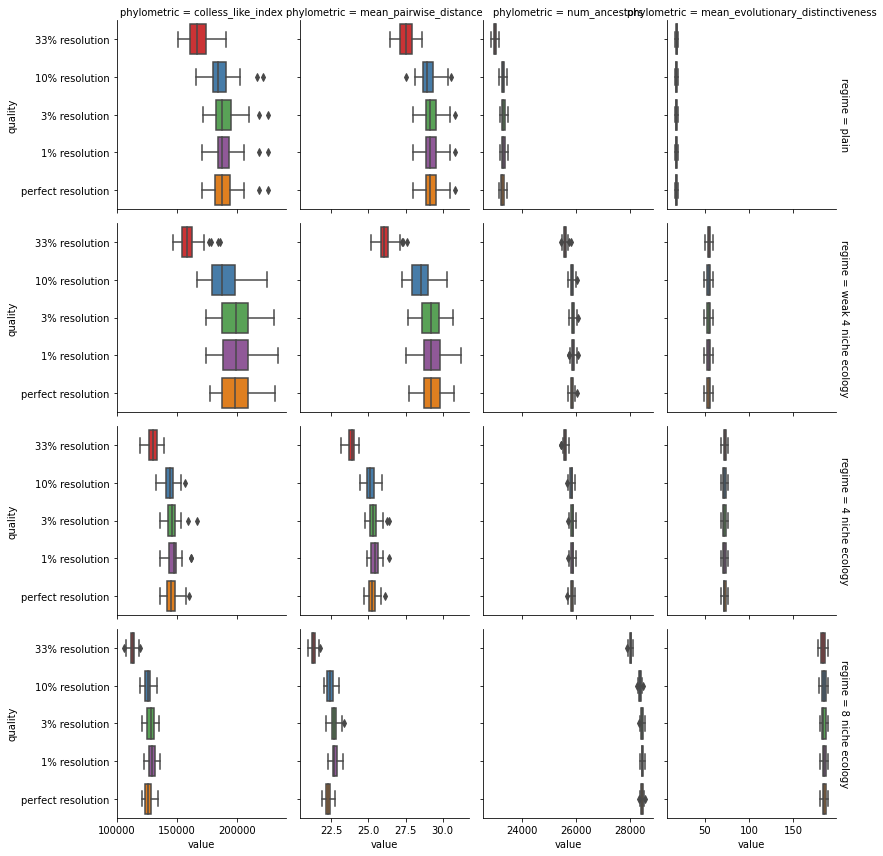

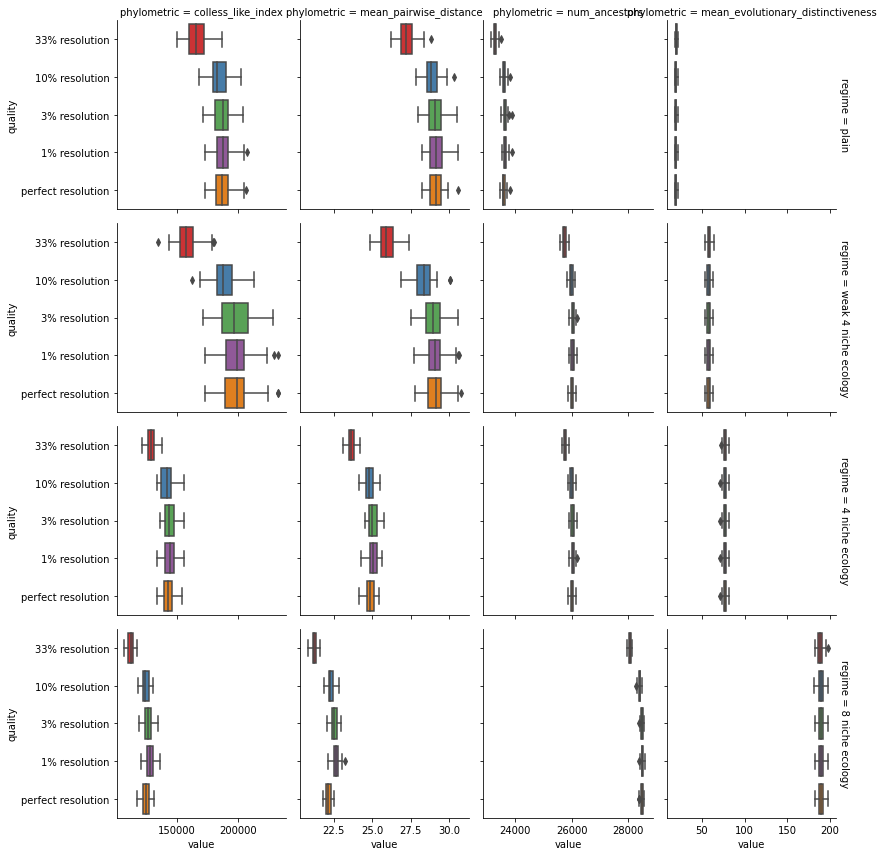

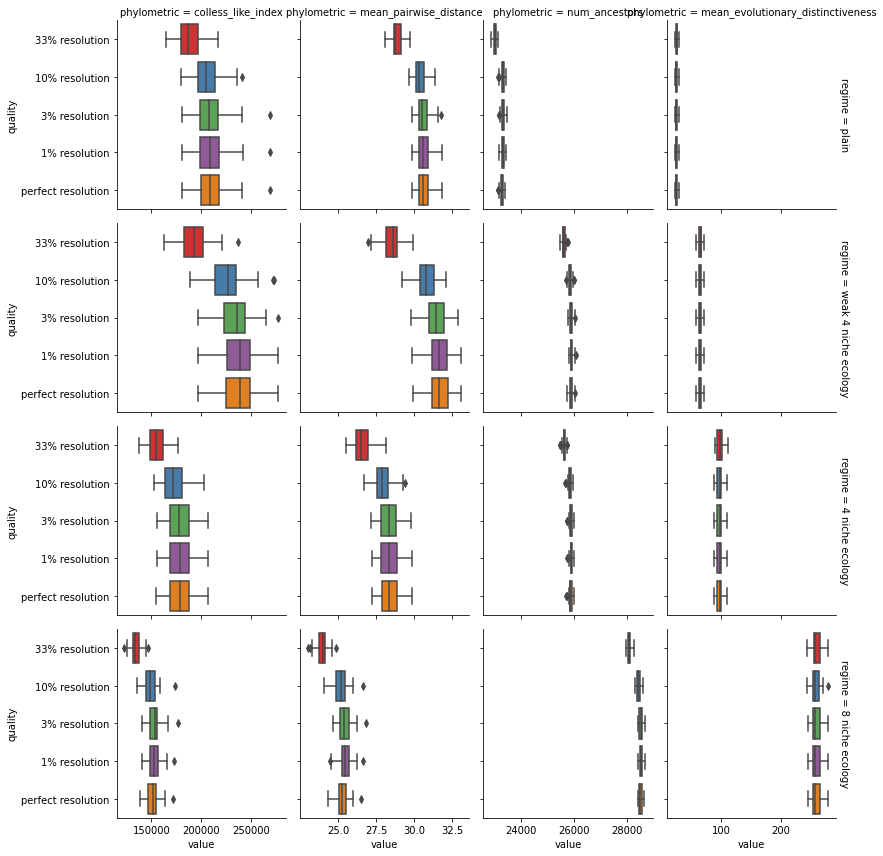

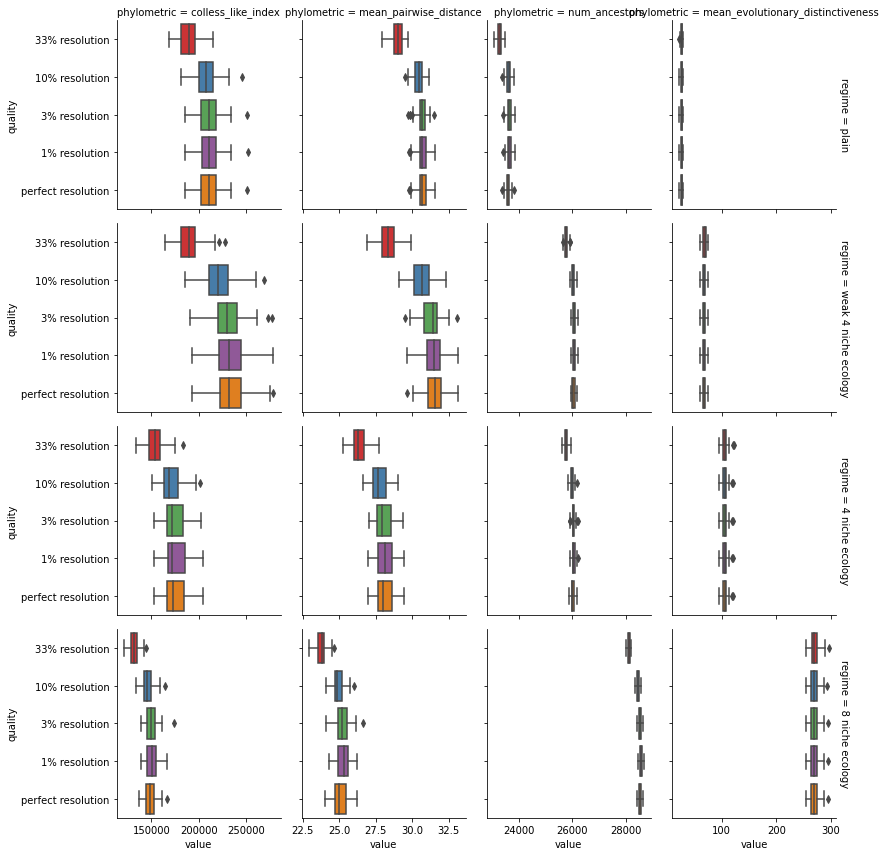

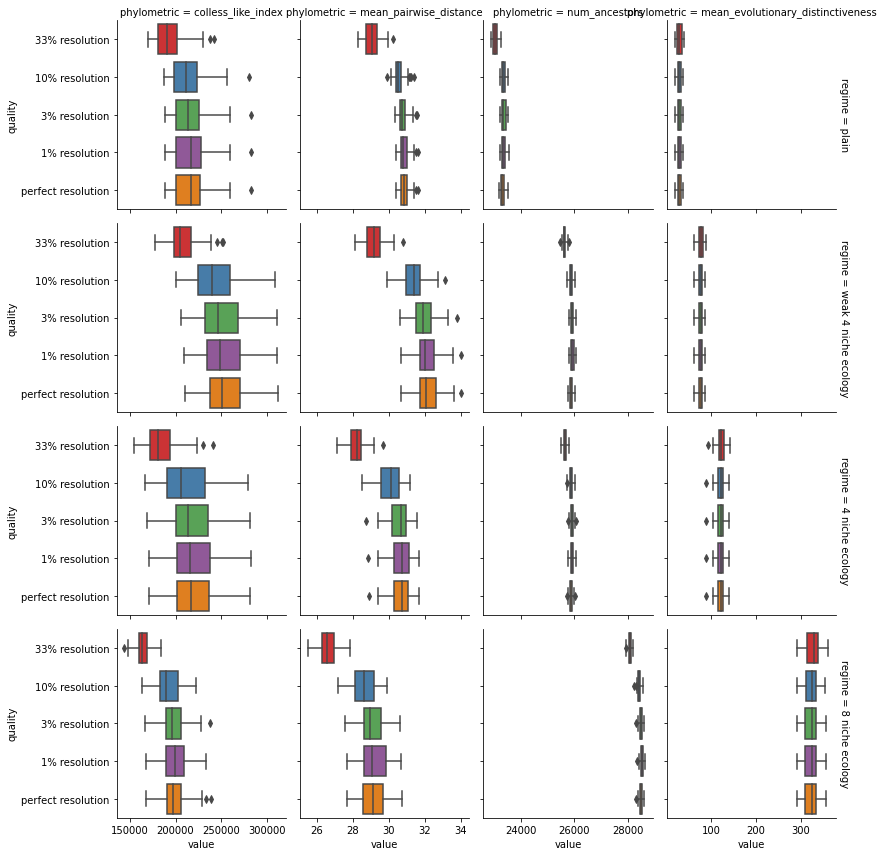

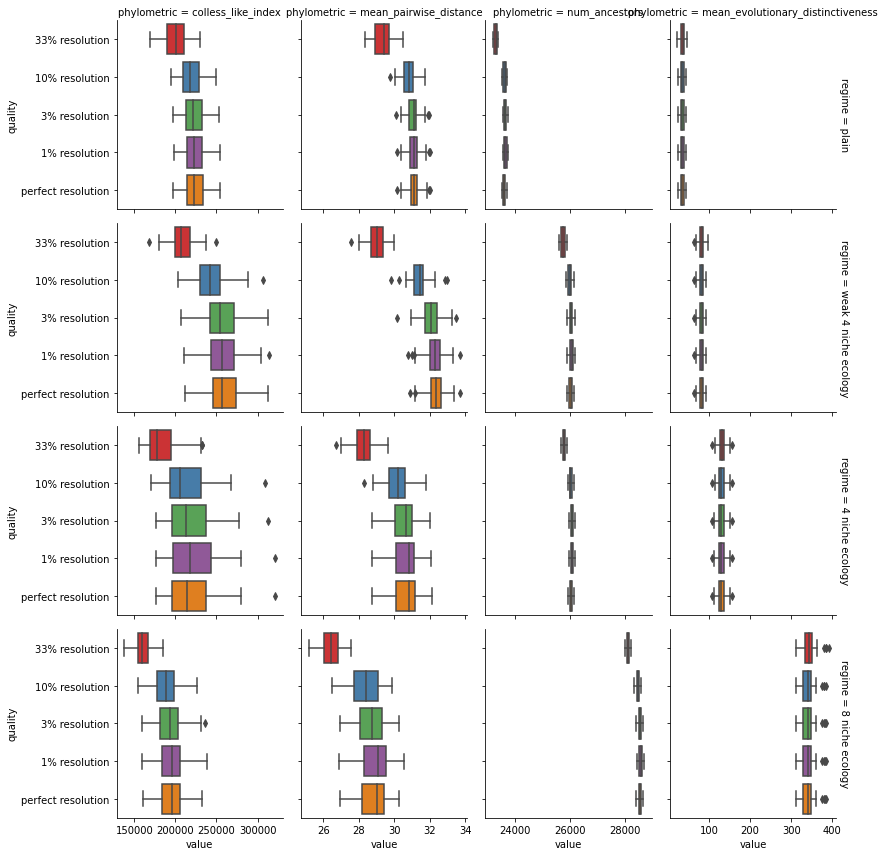

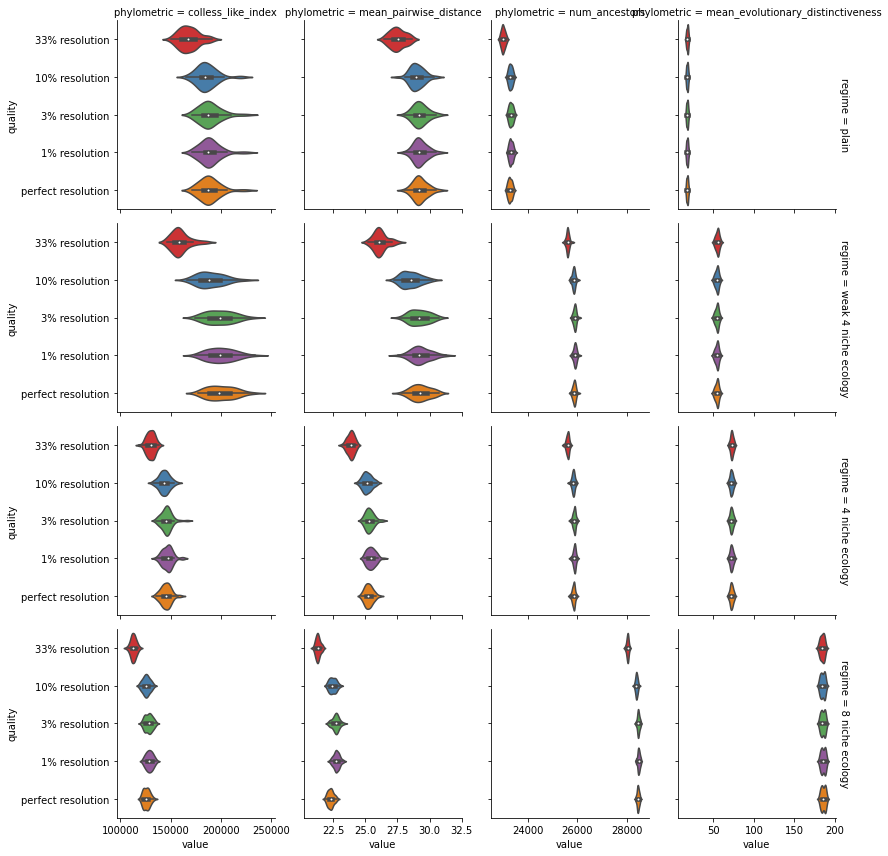

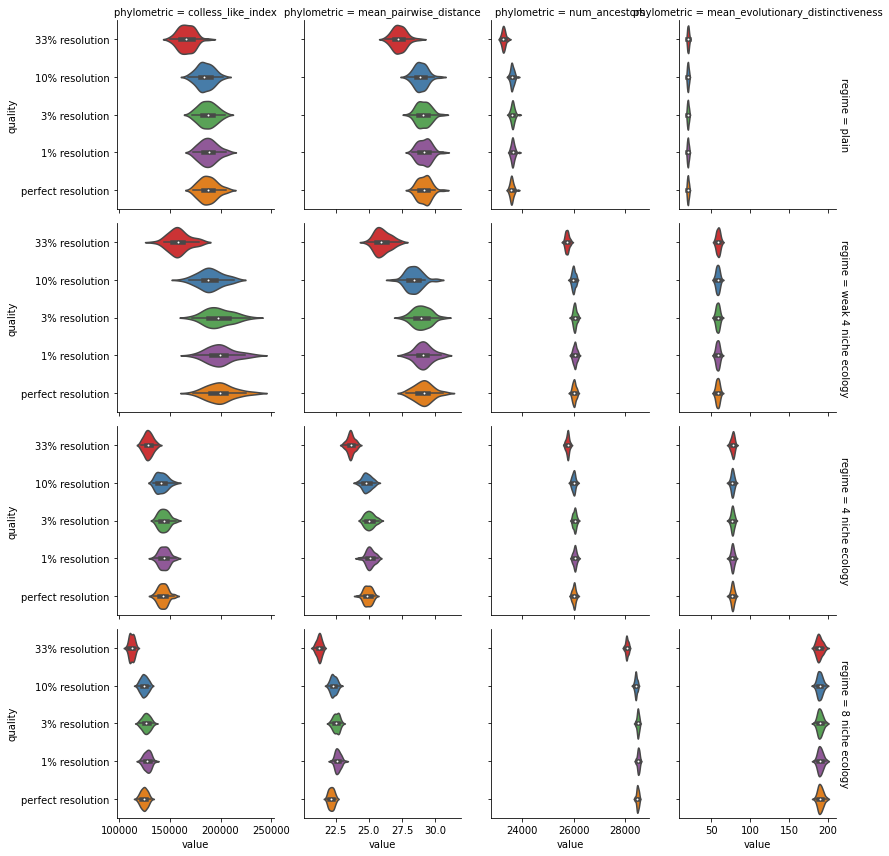

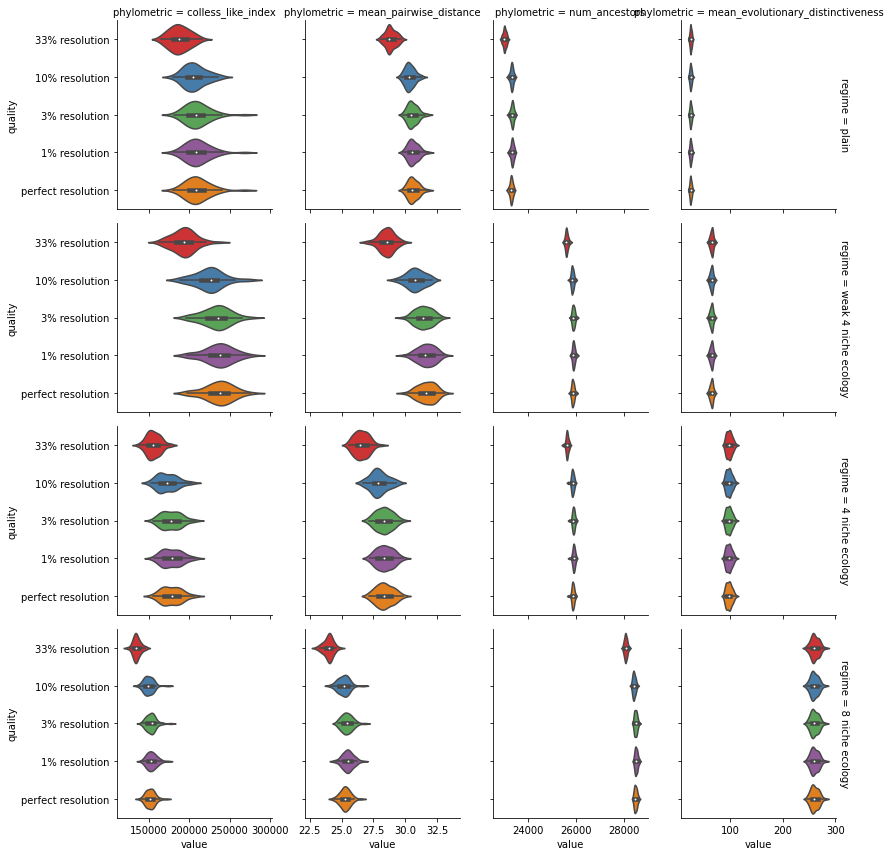

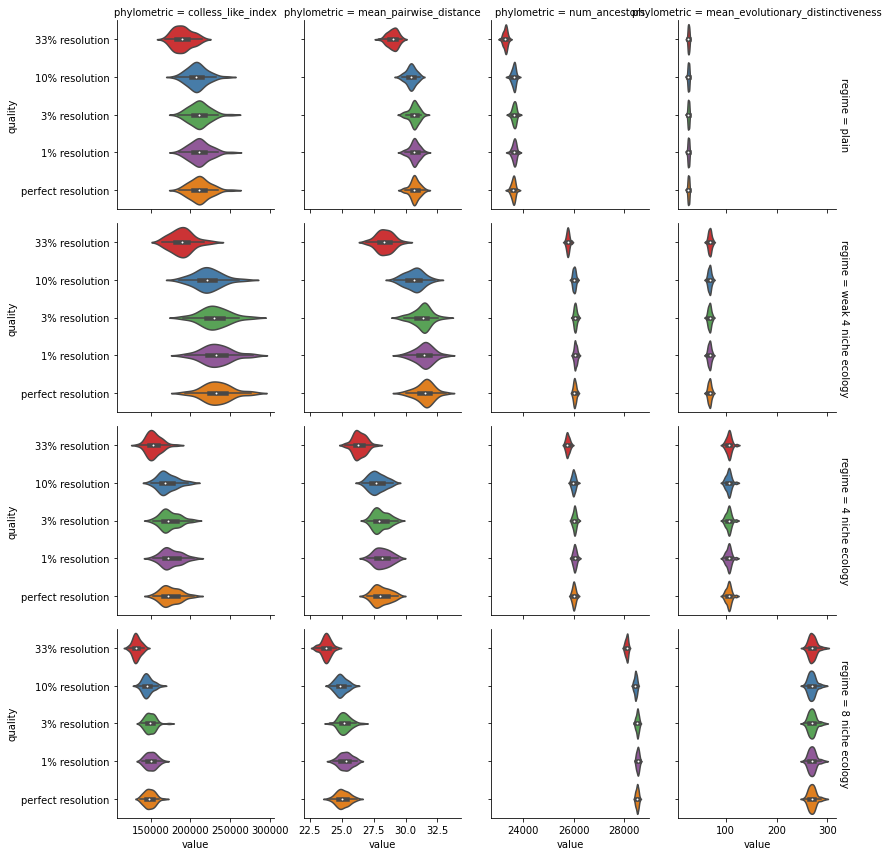

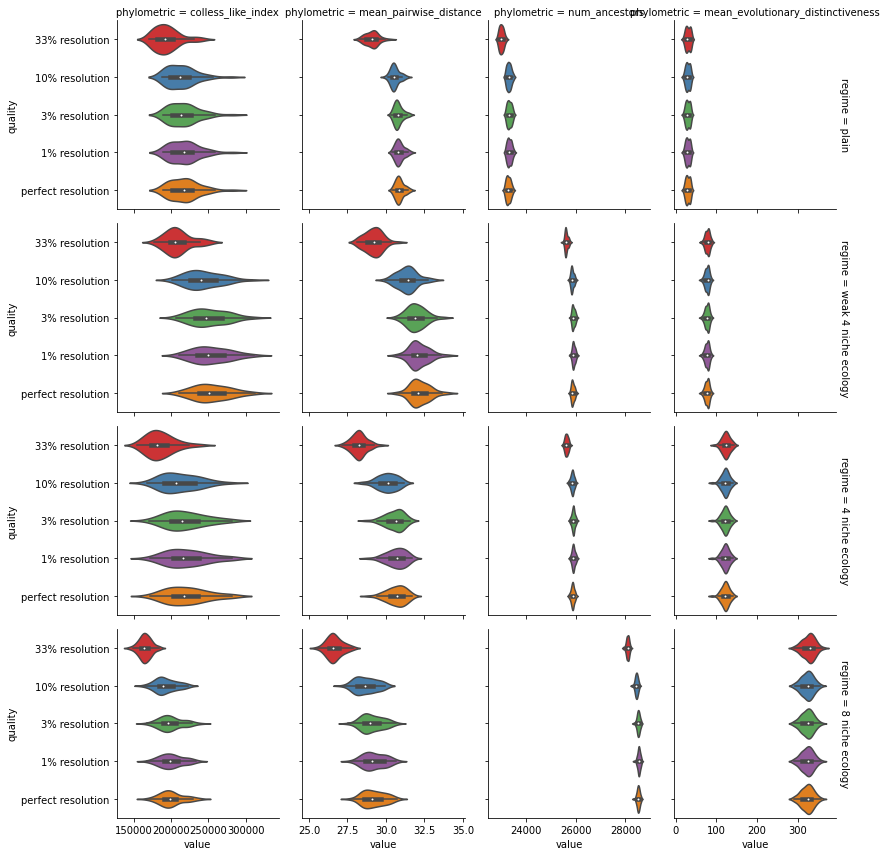

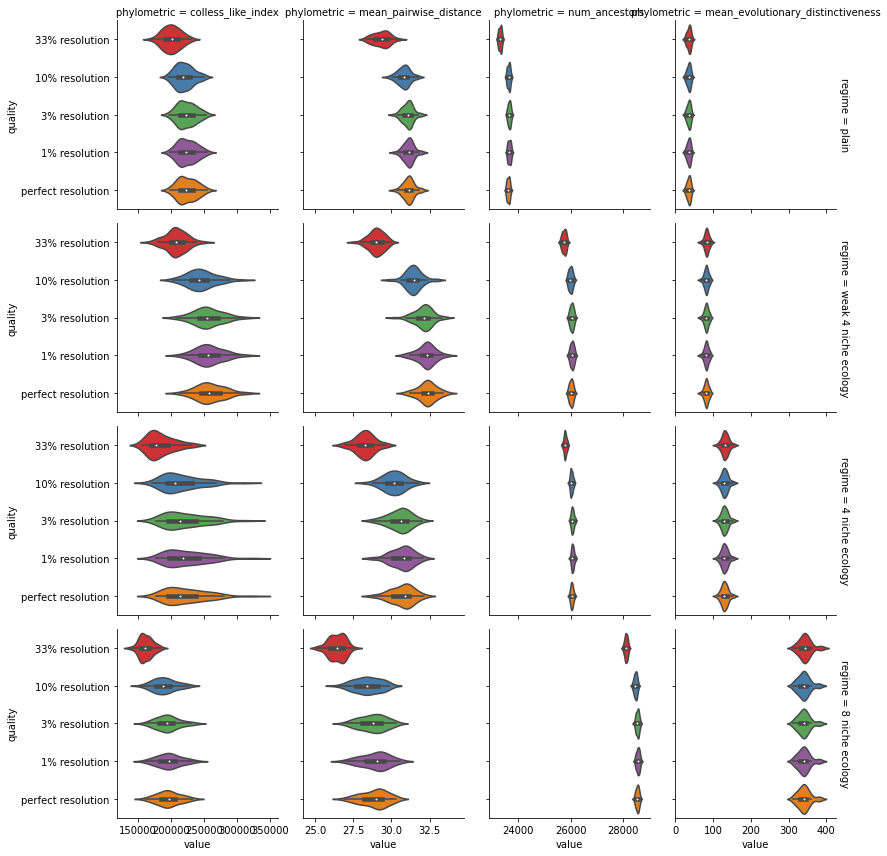

In [21]:
def make_do_plot(plotter):
    def do_plot(data, col, row, x, y):
        g = sns.FacetGrid(
            data,
            col=col,
            row=row,
            row_order=[
                "plain",
                "weak 4 niche ecology",
                "4 niche ecology",
                "8 niche ecology",
            ],
            sharex="col",
            margin_titles=True,
        )
        g.map(
            plotter,
            x,
            y,
            order=[
                "33% resolution",
                "10% resolution",
                "3% resolution",
                "1% resolution",
                "perfect resolution",
            ],
            palette=sns.color_palette("Set1", 5),
        )

    return do_plot


for viz, (group, group_df) in it.product(
    [
        sns.barplot,
        sns.boxplot,
        sns.violinplot,
    ],
    melted_df.groupby(sensitivity_analysis_variables),
):
    do_plot = make_do_plot(viz)
    do_plot.__name__ = viz.__name__
    tp.tee(
        do_plot,
        data=group_df,
        col="phylometric",
        row="regime",
        x="value",
        y="quality",
        teeplot_outattrs={
            **{
                "nuisance": "spatial-structure",
            },
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
        },
    )
